In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PB_All_2000_2021.csv to PB_All_2000_2021 (1).csv


In [ ]:
# STEP 2: Load CSV with correct delimiter
import pandas as pd

df = pd.read_csv('PB_All_2000_2021.csv', delimiter=';')
print("✅ Data loaded successfully!")
print(df.head())


✅ Data loaded successfully!
   id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0  


In [ ]:
# STEP 3: Clean & Prepare Data
# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Create water quality label
def classify_water(row):
    if row['NH4'] <= 0.5 and row['O2'] >= 5.0 and row['BSK5'] <= 5.0:
        return 1  # Good quality
    else:
        return 0  # Poor quality

df['Quality'] = df.apply(classify_water, axis=1)

print("✅ Quality labels created!")
df[['NH4', 'O2', 'BSK5', 'Quality']].head()


✅ Quality labels created!


,NH4,O2,BSK5,Quality
0,0.330,12.30,2.77,1
1,0.044,14.61,3.00,1
2,0.032,9.87,2.10,1
3,0.170,12.40,2.23,1
4,0.000,14.69,3.03,1


from matplotlib import pyplot as plt
_df_0['NH4'].plot(kind='hist', bins=20, title='NH4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['O2'].plot(kind='hist', bins=20, title='O2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['BSK5'].plot(kind='hist', bins=20, title='BSK5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='NH4', y='O2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='O2', y='BSK5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Quality']
  ys = series['NH4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quality')
_ = plt.ylabel('NH4')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Quality']
  ys = series['O2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quality')
_ = plt.ylabel('O2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Quality']
  ys = series['BSK5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quality')
_ = plt.ylabel('BSK5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Quality']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Quality'}, axis=1)
              .sort_values('Quality', ascending=True))
  xs = counted['Quality']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quality')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['NH4'].plot(kind='line', figsize=(8, 4), title='NH4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['O2'].plot(kind='line', figsize=(8, 4), title='O2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['BSK5'].plot(kind='line', figsize=(8, 4), title='BSK5')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# STEP 4: Feature Selection and Scaling
from sklearn.preprocessing import StandardScaler

X = df[['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']]
y = df['Quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled.")


✅ Features scaled.


In [ ]:
# STEP 5: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# STEP 6: Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained.")


✅ Model trained.


In [ ]:
# STEP 7: Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


✅ Confusion Matrix:
[[254   1]
 [  0 301]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       301

    accuracy                           1.00       556
   macro avg       1.00      1.00      1.00       556
weighted avg       1.00      1.00      1.00       556



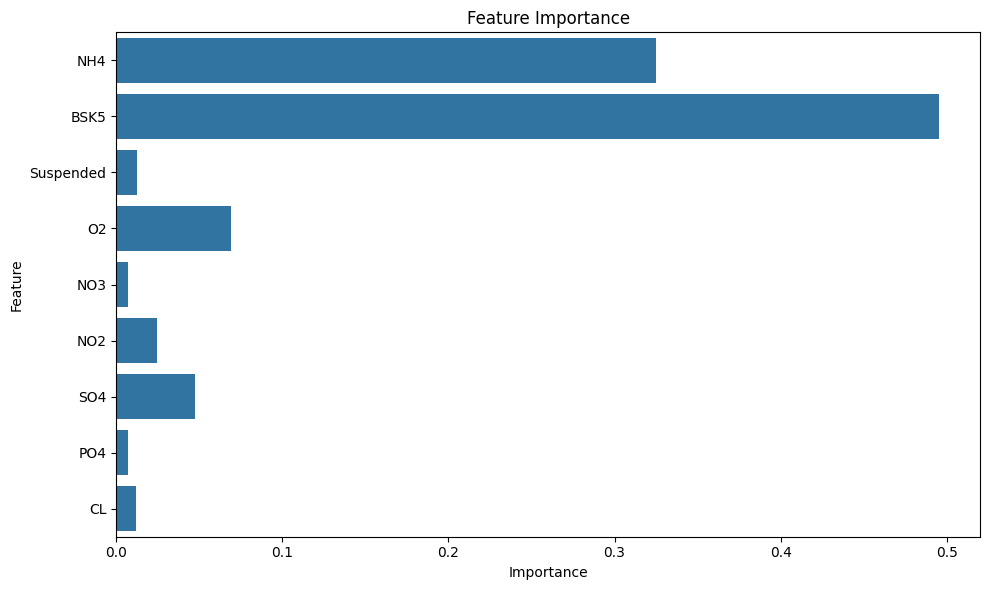

In [ ]:
# STEP 8: Plot Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
